<a href="https://www.kaggle.com/code/imeldamaretta/modelml-yolov8-ipynb?scriptVersionId=235028779" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mount Google Drive

Only do this if you're using Colab

In [1]:
#from google.colab import drive

#drive.mount('/content/drive')

# Install Necessary Library

In [2]:
'''! pip install ultralytics

! pip install tensorflow

! pip install keras

! pip install roboflow'''

'! pip install ultralytics\n\n! pip install tensorflow\n\n! pip install keras\n\n! pip install roboflow'

# Importing Library

In [3]:
'''from ultralytics import YOLO

import matplotlib.pyplot as plt

import tensorflow as tf

import cv2'''

'from ultralytics import YOLO\n\nimport matplotlib.pyplot as plt\n\nimport tensorflow as tf\n\nimport cv2'

# Downloading and Extracting the Dataset in Zip File

## Importing the Dataset from Roboflow

Importing the dataset straight from Roboflow will automatically extract the zip file

In [4]:
# from google.colab import userdata

#RF_TOKEN = userdata.get('RF_TOKEN')

In [5]:
!pip install roboflow

from roboflow import Roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.3 MB/s eta 0:00:00


In [6]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
RF_TOKEN = user_secrets.get_secret("RF_TOKEN")

In [7]:
rf = Roboflow(api_key=RF_TOKEN)
project = rf.workspace("florys-ijzit").project("flower-disease-aoxpb")
version = project.version(9)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Flower-Disease-9 in yolov8:: 100%|██████████| 7182/7182 [00:00<00:00, 8419.49it/s]


# Training the Model

In [8]:
!pip install --upgrade ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 25.5 MB/s eta 0:00:00
  Attempting uninstall: ray
    Found existing installation: ray 2.24.0
    Uninstalling ray-2.24.0:
      Successfully uninstalled ray-2.24.0


In [9]:
!pip install git+https://github.com/ultralytics/ultralytics.git@main

  Cloning https://github.com/ultralytics/ultralytics.git (to revision main) to /tmp/pip-req-build-idaekben
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-idaekben
  Resolved https://github.com/ultralytics/ultralytics.git to commit 34c05310149d272bb0a7ed7adb23539d37c99b3b
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for ultralytics: filename=ultralytics-8.3.111-py3-none-any.whl size=980427 sha256=6de7ec218e439d3207ea45e2a495c2df9da4fb2ebee1cfd505925ac756cad10e
  Stored in directory: /tmp/pip-ephem-wheel-cache-rdvpcaxg/wheels/60/db/e5/6abbdd13b4e3d5e2fdcd87690cd8738f842eeb37142fdccb5b
Successfully built ultralytics


In [10]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
# Load YOLOv8 model
model = YOLO('yolov8n.pt')

# Train on custom dataset
model.train(
    data='/kaggle/working/Flower-Disease-9/data.yaml',
    epochs=50,
    imgsz=640,
    batch=32,
    lr0=0.01,
    optimizer='SGD',
    save=True
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 18.3MB/s]


Ultralytics 8.3.111 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Flower-Disease-9/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 2.04MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 16.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 764.6±266.8 MB/s, size: 45.1 KB)


train: Scanning /kaggle/working/Flower-Disease-9/train/labels... 2978 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2978/2978 [00:02<00:00, 1105.87it/s]

train: New cache created: /kaggle/working/Flower-Disease-9/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 348, len(boxes) = 13435. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 519.2±240.2 MB/s, size: 44.1 KB)


val: Scanning /kaggle/working/Flower-Disease-9/valid/labels... 317 images, 3 backgrounds, 0 corrupt: 100%|██████████| 317/317 [00:00<00:00, 1167.87it/s]

val: New cache created: /kaggle/working/Flower-Disease-9/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.12G      1.351      3.086      1.517         11        640: 100%|██████████| 94/94 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        317        958      0.311      0.343      0.251      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.05G        1.3      2.074      1.399         20        640: 100%|██████████| 94/94 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]

                   all        317        958      0.492      0.306      0.339      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.05G      1.272      1.727      1.371         15        640: 100%|██████████| 94/94 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        317        958      0.444      0.387      0.258      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.05G      1.303      1.669      1.394         32        640: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.04it/s]

                   all        317        958      0.318      0.193      0.098     0.0538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.05G      1.284      1.573      1.394         21        640: 100%|██████████| 94/94 [00:30<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]

                   all        317        958      0.313      0.384      0.293      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.05G      1.244      1.451      1.366         22        640: 100%|██████████| 94/94 [00:29<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        317        958      0.468      0.352      0.414      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.05G       1.23      1.392      1.358         10        640: 100%|██████████| 94/94 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        317        958      0.405      0.453      0.382      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.05G      1.207      1.329      1.343         27        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]

                   all        317        958      0.446      0.397      0.451      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.05G      1.184      1.267      1.332         12        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        317        958      0.342      0.422      0.324      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.05G      1.176      1.229       1.32         18        640: 100%|██████████| 94/94 [00:30<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]

                   all        317        958      0.391      0.443      0.424      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.05G      1.161      1.168      1.318         18        640: 100%|██████████| 94/94 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]

                   all        317        958      0.326      0.446      0.327      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/50      5.05G      1.152      1.143      1.309         18        640: 100%|██████████| 94/94 [00:30<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        317        958      0.479      0.451      0.403       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/50      5.05G      1.145      1.109      1.306         29        640: 100%|██████████| 94/94 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        317        958      0.288      0.495      0.337       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/50      5.05G      1.133      1.088      1.303         10        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        317        958      0.323      0.364      0.322       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/50      5.05G      1.122      1.062      1.303          8        640: 100%|██████████| 94/94 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        317        958       0.42      0.398      0.368      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/50      5.05G      1.093      1.012      1.276         25        640: 100%|██████████| 94/94 [00:30<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        317        958      0.209        0.4      0.295      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/50      5.05G      1.092     0.9987      1.271         17        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        317        958      0.276      0.344      0.291        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/50      5.05G      1.073     0.9679      1.264         17        640: 100%|██████████| 94/94 [00:30<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        317        958      0.405      0.386      0.405      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/50      5.05G      1.069     0.9616      1.265         11        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all        317        958      0.297      0.309      0.319      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/50      5.05G      1.068     0.9401      1.257         26        640: 100%|██████████| 94/94 [00:30<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]

                   all        317        958      0.404      0.332       0.37      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      21/50      5.05G       1.05     0.9173      1.245         16        640: 100%|██████████| 94/94 [00:30<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]

                   all        317        958      0.469      0.385      0.459       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      22/50      5.05G      1.047     0.8918      1.248         17        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        317        958       0.32      0.315      0.316      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      23/50      5.05G      1.035     0.8864      1.235         23        640: 100%|██████████| 94/94 [00:29<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]

                   all        317        958      0.333      0.443      0.319      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      24/50      5.05G      1.026     0.8531      1.227         17        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        317        958      0.441      0.418       0.42      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      25/50      5.05G      1.018     0.8458      1.222         27        640: 100%|██████████| 94/94 [00:30<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

                   all        317        958      0.417      0.427      0.431      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      26/50      5.05G      1.005     0.8304      1.224         17        640: 100%|██████████| 94/94 [00:30<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

                   all        317        958      0.516      0.389      0.461      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      27/50      5.05G      1.009     0.8181      1.221         11        640: 100%|██████████| 94/94 [00:30<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        317        958      0.439       0.39      0.422      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      28/50      5.05G     0.9971     0.8199      1.218         31        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]

                   all        317        958      0.451      0.379      0.462      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      29/50      5.05G     0.9934     0.8053      1.213         30        640: 100%|██████████| 94/94 [00:30<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        317        958      0.452      0.402       0.46      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      30/50      5.05G     0.9878     0.7863      1.206         10        640: 100%|██████████| 94/94 [00:30<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all        317        958       0.44      0.386       0.43      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      31/50      5.05G     0.9694     0.7736      1.196         19        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all        317        958      0.452      0.397      0.465      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      32/50      5.05G     0.9717      0.753      1.194         23        640: 100%|██████████| 94/94 [00:30<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.18it/s]

                   all        317        958      0.439      0.423      0.425      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      33/50      5.05G     0.9597     0.7508      1.195         18        640: 100%|██████████| 94/94 [00:30<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        317        958      0.595      0.412      0.492      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      34/50      5.05G     0.9554      0.738      1.191          9        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]

                   all        317        958      0.513      0.376       0.44      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      35/50      5.05G     0.9466     0.7245      1.183         22        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

                   all        317        958      0.389      0.407      0.397      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      36/50      5.05G     0.9324     0.7279      1.181         14        640: 100%|██████████| 94/94 [00:29<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        317        958      0.425      0.411      0.408      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      37/50      5.05G     0.9308     0.7064      1.178         19        640: 100%|██████████| 94/94 [00:29<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        317        958      0.417      0.389      0.462      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      38/50      5.05G      0.913     0.7004      1.166         32        640: 100%|██████████| 94/94 [00:30<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        317        958      0.464      0.418      0.466      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      39/50      5.05G     0.9068     0.6844      1.162         35        640: 100%|██████████| 94/94 [00:30<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]

                   all        317        958      0.454       0.42      0.445      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      40/50      5.05G     0.9123     0.6873      1.163         14        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.24it/s]

                   all        317        958      0.439      0.416      0.426      0.279
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.05G     0.8561      0.576      1.144          7        640: 100%|██████████| 94/94 [00:30<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        317        958      0.437      0.431      0.444       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      42/50      5.05G     0.8264     0.5215      1.119          8        640: 100%|██████████| 94/94 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]

                   all        317        958      0.439      0.391      0.465      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      43/50      5.05G     0.8185     0.5276      1.126          2        640: 100%|██████████| 94/94 [00:29<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        317        958      0.521      0.418      0.458      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      44/50      5.05G     0.7951     0.4978      1.095         19        640: 100%|██████████| 94/94 [00:28<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        317        958      0.473      0.398      0.465      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      45/50      5.05G     0.7886     0.4894      1.098          6        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        317        958      0.494      0.372      0.447      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      46/50      5.05G     0.7704     0.4697      1.087          4        640: 100%|██████████| 94/94 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

                   all        317        958      0.473      0.424      0.464      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      47/50      5.05G     0.7637     0.4584      1.079         11        640: 100%|██████████| 94/94 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        317        958       0.49      0.408      0.474      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      48/50      5.05G     0.7565     0.4451      1.077          8        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]

                   all        317        958      0.536      0.387      0.445      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      49/50      5.05G     0.7366     0.4347      1.066          2        640: 100%|██████████| 94/94 [00:28<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

                   all        317        958      0.538      0.394      0.477      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      50/50      5.05G     0.7361     0.4402      1.065          5        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        317        958        0.5      0.392      0.467        0.3

50 epochs completed in 0.450 hours.


Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


                   all        317        958      0.595      0.412      0.492      0.326
            black-spot         71        172      0.959       0.82      0.924      0.689
                blight         92         98          0          0          0          0
          downy-mildew          6         12        0.9          1      0.995      0.582
        fungal-disease        100        100      0.783       0.03      0.205     0.0754
               healthy        201        562      0.931      0.624       0.82      0.606
                orchid          3         14          0          0    0.00932    0.00404
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792ece44c280>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

# Evaluating the Model

In [12]:
# Evaluate the model
metrics = model.val(data='/kaggle/working/Flower-Disease-9/data.yaml')

# Print the evaluation metrics
print(metrics)

# Access specific metrics
print(f"mAP@0.5: {metrics.box.map50}")
print(f"mAP@0.5:0.95: {metrics.box.map}")

# Visualize the results using the plot method
results = model.val(data='/kaggle/working/Flower-Disease-9/data.yaml',plots=True)

Ultralytics 8.3.111 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1232.7±448.3 MB/s, size: 42.7 KB)


val: Scanning /kaggle/working/Flower-Disease-9/valid/labels.cache... 317 images, 3 backgrounds, 0 corrupt: 100%|██████████| 317/317 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]


                   all        317        958      0.595      0.412      0.492      0.326
            black-spot         71        172      0.958       0.82      0.925      0.688
                blight         92         98          0          0          0          0
          downy-mildew          6         12      0.899          1      0.995      0.583
        fungal-disease        100        100      0.782       0.03      0.205     0.0739
               healthy        201        562      0.929      0.625       0.82      0.607
                orchid          3         14          0          0    0.00931    0.00415
Speed: 2.0ms preprocess, 4.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792ecd4a04c0>
curves: ['Precision-Rec

val: Scanning /kaggle/working/Flower-Disease-9/valid/labels.cache... 317 images, 3 backgrounds, 0 corrupt: 100%|██████████| 317/317 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]


                   all        317        958      0.595      0.412      0.492      0.326
            black-spot         71        172      0.958       0.82      0.925      0.688
                blight         92         98          0          0          0          0
          downy-mildew          6         12      0.899          1      0.995      0.583
        fungal-disease        100        100      0.782       0.03      0.205     0.0739
               healthy        201        562      0.929      0.625       0.82      0.607
                orchid          3         14          0          0    0.00931    0.00415
Speed: 1.8ms preprocess, 4.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train3


# Testing the Model

In [13]:
!wget 'https://scitechdaily.com/images/Blue-Orchid.jpg' -O 'disease_1.jpg'

--2025-04-20 13:32:45--  https://scitechdaily.com/images/Blue-Orchid.jpg
Resolving scitechdaily.com (scitechdaily.com)... 104.26.0.4, 104.26.1.4, 172.67.68.229, ...
Connecting to scitechdaily.com (scitechdaily.com)|104.26.0.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 289882 (283K) [image/jpeg]
Saving to: 'disease_1.jpg'

disease_1.jpg       100%[===================>] 283.09K   672KB/s    in 0.4s    

2025-04-20 13:32:47 (672 KB/s) - 'disease_1.jpg' saved [289882/289882]




image 1/1 /kaggle/working/disease_1.jpg: 448x640 1 orchid, 1 rose, 34.9ms
Speed: 3.7ms preprocess, 34.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([6., 7.], device='cuda:0')
conf: tensor([0.7109, 0.3705], device='cuda:0')
data: tensor([[1.3537e+03, 6.7353e+02, 1.8581e+03, 1.2927e+03, 7.1093e-01, 6.0000e+00],
        [2.1623e+02, 2.8655e+01, 1.8640e+03, 9.4238e+02, 3.7054e-01, 7.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1343, 2000)
shape: torch.Size([2, 6])
xywh: tensor([[1605.9021,  983.1252,  504.4883,  619.1920],
        [1040.1118,  485.5170, 1647.7598,  913.7249]], device='cuda:0')
xywhn: tensor([[0.8030, 0.7320, 0.2522, 0.4611],
        [0.5201, 0.3615, 0.8239, 0.6804]], device='cuda:0')
xyxy: tensor([[1353.6580,  673.5292, 1858.1462, 1292.7212],
        [ 216.2319,   28.6546, 1863.9917,  942.3795]], device='cuda:0')
xyxyn: te

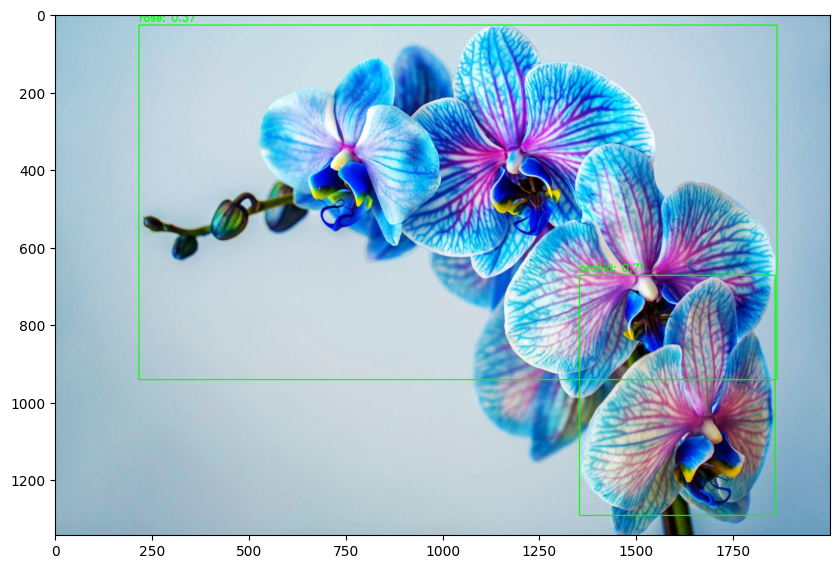

In [14]:
import cv2
import matplotlib.pyplot as plt


# Load the trained model. Replace with the actual path to your trained weights.
model_path = '/kaggle/working/runs/detect/train/weights/best.pt' # Update with the correct path to your trained weights
model = YOLO(model_path)

# Testing the Model
test_path = '/kaggle/working/disease_1.jpg'
results = model.predict(source=test_path, save=True, conf=0.25)

# Print the bounding boxes, confidence scores, and class names.
for r in results:
    print(r.boxes) # Print bounding box information
    print(r.boxes.conf) # Print confidence scores
    print(r.boxes.cls) # Print predicted classes

# Display the image with bounding boxes
img = cv2.imread(test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB format

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0]
        cls = int(box.cls[0])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding boxes
        text = f"{model.names[cls]}: {conf:.2f}"
        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

# Saving the Model for Deployment

In [15]:
#from google.colab import files

# Using h5 format

In [16]:
#model.save('florys.h5')

# Using saved_model format

In [17]:
#odel.export(format='saved_model')

In [18]:
#!zip -r saved_model.zip /kaggle/working/runs/detect/train/weights/best_saved_model

In [19]:
'''from IPython.display import FileLink
FileLink(r'saved_model.zip')'''

"from IPython.display import FileLink\nFileLink(r'saved_model.zip')"

# Using the TF.js format

In [20]:
#model.export(format = 'tfjs')

In [21]:
#!zip -r tfjs.zip /kaggle/working/runs/detect/train/weights/best_web_model

In [22]:
'''from IPython.display import FileLink
FileLink(r'tfjs.zip')'''

"from IPython.display import FileLink\nFileLink(r'tfjs.zip')"

## Using the TFLite format

In [23]:
#model.save('florys.tflite')

In [24]:
#model.export(format='tflite')

In [25]:
#FileLink(r'runs/detect/train/weights/best_saved_model/best_float32.tflite')

In [26]:
#files.download('/kaggle/working/runs/detect/train2/weights/best_saved_model/best_float32.tflite')

## (Optional) Using PyTorch

In [27]:
#model.save('florys.pt')

In [28]:
#files.download('/content/florys.pt')

## (Optional) Save to onnx File

In [29]:
#model.save('florys.onnx')

In [30]:
#model.export(format='onnx')

In [31]:
#FileLink(r'runs/detect/train/weights/best.onnx')

In [32]:
#files.download('/content/runs/detect/train2/weights/best.onnx')